In [20]:
# Import the module "epanet" from the package "epyt"
from epyt import epanet

In [21]:
# Load the L-Town epanet input file and create the object G
G = epanet('L-TOWN.inp')

EPANET version 20200 loaded (EPyT version 1.0.5).
Input File L-TOWN.inp loaded successfully.



In [22]:
dir(G)  # Lists all available functions and properties in G

['BinTempfile',
 'CMDCODE',
 'ControlLevelValues',
 'ControlLinkIndex',
 'ControlNodeIndex',
 'ControlRulesCount',
 'ControlSettings',
 'ControlTypes',
 'ControlTypesIndex',
 'Controls',
 'CurveCount',
 'CurveIndex',
 'CurvesInfo',
 'DEMANDMODEL',
 'InputFile',
 'Iterations',
 'LOGOP',
 'LibEPANET',
 'LibEPANETpath',
 'LinkBulkReactionCoeff',
 'LinkCount',
 'LinkDiameter',
 'LinkFlowUnits',
 'LinkIndex',
 'LinkInitialSetting',
 'LinkInitialStatus',
 'LinkLength',
 'LinkMinorLossCoeff',
 'LinkNameID',
 'LinkPipeCount',
 'LinkPipeIndex',
 'LinkPipeNameID',
 'LinkPumpCount',
 'LinkPumpHeadCurveIndex',
 'LinkPumpIndex',
 'LinkPumpNameID',
 'LinkPumpPatternIndex',
 'LinkPumpPatternNameID',
 'LinkPumpPower',
 'LinkPumpType',
 'LinkPumpTypeCode',
 'LinkRoughnessCoeff',
 'LinkType',
 'LinkTypeIndex',
 'LinkValveCount',
 'LinkValveIndex',
 'LinkValveNameID',
 'LinkWallReactionCoeff',
 'NodeBaseDemands',
 'NodeCoordinates',
 'NodeCount',
 'NodeDemandCategoriesNumber',
 'NodeDemandPatternIndex',


In [23]:
help(G.getNodeElevations)  # Retrieve some examples for the function getNodeElevations

Help on method getNodeElevations in module epyt.epanet:

getNodeElevations(*argv) method of epyt.epanet.epanet instance
    Retrieves the value of all node elevations.
    Example:
    
    >>> d.getNodeElevations()             # Retrieves the value of all node elevations
    >>> d.getNodeElevations(1)            # Retrieves the value of the first node elevation
    >>> d.getNodeElevations([4, 5, 6])    # Retrieves the value of the 5th to 7th node elevations
    
    See also setNodeElevations, getNodesInfo, getNodeNameID,
    getNodeType, getNodeEmitterCoeff, getNodeInitialQuality.



In [24]:
diameters = G.getLinkDiameter()  # retrieve Link diameters
print(diameters)

[200. 150. 200. 100. 100. 100. 100. 100. 150. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 150. 100. 100. 200. 150. 100. 100.
 100. 100. 100. 100. 100. 100. 200. 100. 100. 100. 100. 100. 100. 100.
 150. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 150. 150. 150. 150. 150.  63.  63. 150. 100.  75. 100. 100. 100.
 100.  63. 150. 150. 150. 150. 150. 160. 160. 100. 100. 100. 100. 100.
 100. 100. 160. 100. 100. 150. 100. 100. 150. 100. 100. 200. 100.  63.
 150. 100. 100. 100. 100. 150. 100. 150. 150. 150. 100. 150. 150. 100.
 100. 150. 100. 100. 100. 150. 100. 150. 100. 100. 160. 100. 100. 100.
 160. 100. 160. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 150. 100. 100. 100. 100. 100. 100. 100. 150. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 200.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 150. 

In [25]:
elevations = G.getNodeElevations()  # retrieve Node elevations
print(elevations)

[ 73.2105  73.8737  73.1782  68.2608  65.5695  70.9095  75.9175  64.4833
  69.2626  74.3469  63.0588  68.2274  61.9901  68.5805  70.9492  68.7986
  60.5935  67.142   73.3626  65.9549  59.6849  76.1173  64.2052  67.8217
  58.9717  61.6305  65.7763  61.4047  71.5429  75.3299  65.0059  71.159
  60.5902  65.8482  59.6258  70.1959  63.9172  58.5794  62.9791  60.2093
  69.2961  61.0635  61.8585  66.1177  62.5989  38.8781  38.7028  40.1135
  34.8665  44.7174  29.8508  33.2106  29.1285  36.6718  43.7044  32.7019
  34.5788  30.1017  40.544   36.5477  36.5714  35.96    37.0071  34.9234
  36.2244  34.276   32.5016  41.0943  27.7774  29.8554  30.0823  34.4673
  33.0899  32.3582  40.1001  30.5603  33.9737  29.2383  32.7267  27.7113
  31.0269  39.6884  35.7824  28.8092  38.6811  38.1149  35.2466  34.2301
  31.7913  36.3955  33.0649  33.1049  29.3998  27.5188  25.4416  24.1924
  27.2125  25.5648  23.3478  25.0658  24.157   23.6941  24.3635  20.9592
  24.022   23.5008  23.541   19.8166  23.4984  23.83

In [26]:
G.getLinkDiameter([2, 10])  # Link diameter for link indices 2 & 10
G.setLinkDiameter(10, 90)  # Change the link with index 10 diameter to 90mm
n_diameter = G.getLinkDiameter([2, 10])  # Retrieve the diameter of link index 10
print(n_diameter)

[150.  90.]


In [27]:
# Solve hydraulics and quality dynamics
# H = G.getComputedHydraulicTimeSeries()  # Solve hydraulics in library
# Q = G.getComputedQualityTimeSeries()  # Solve quality dynamics in library
R = G.getComputedTimeSeries_ENepanet()  # Solve all dynamics in library, create a binary file to store the computed
# values

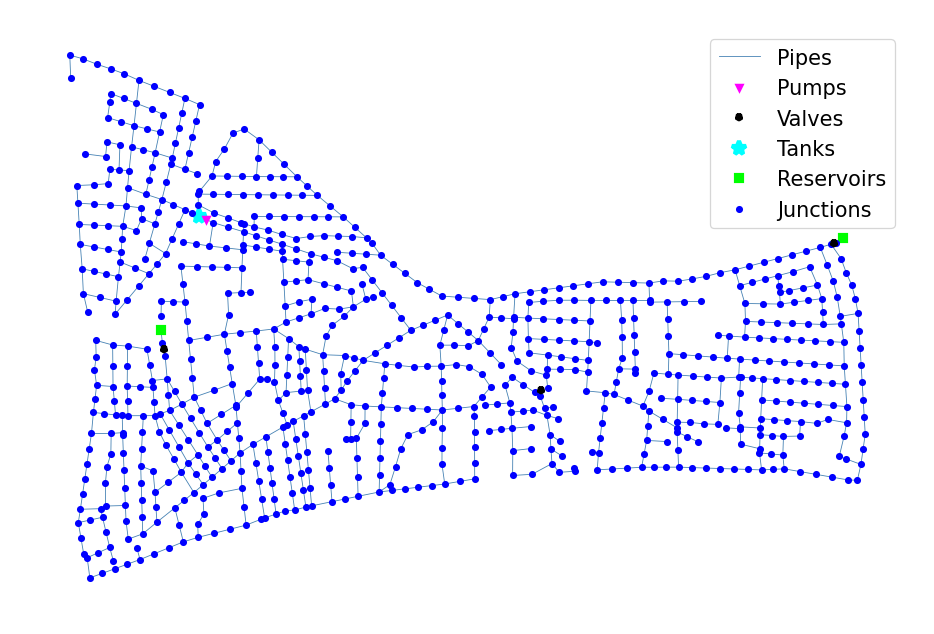

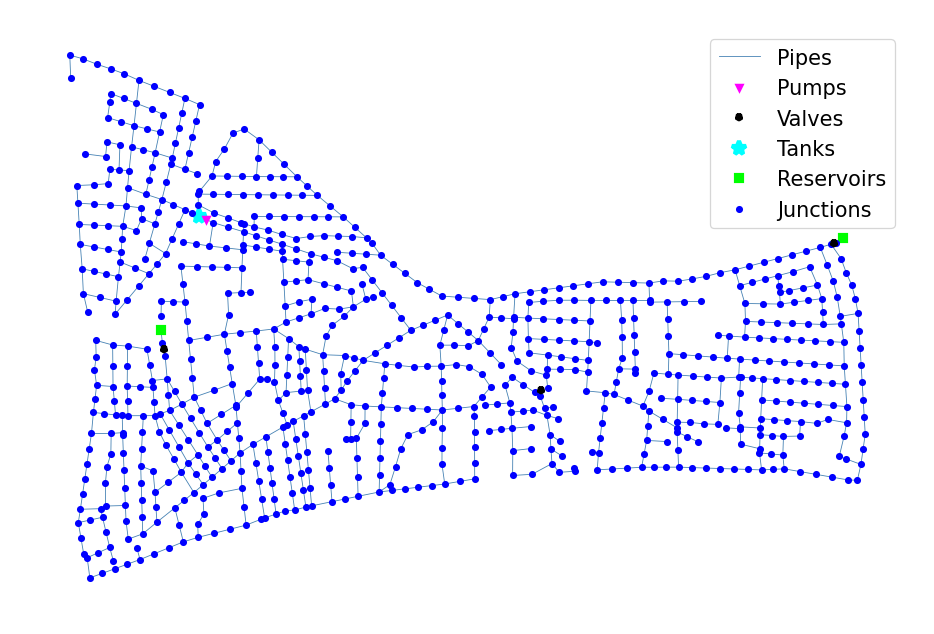

In [28]:
# Plot Network
G.plot()

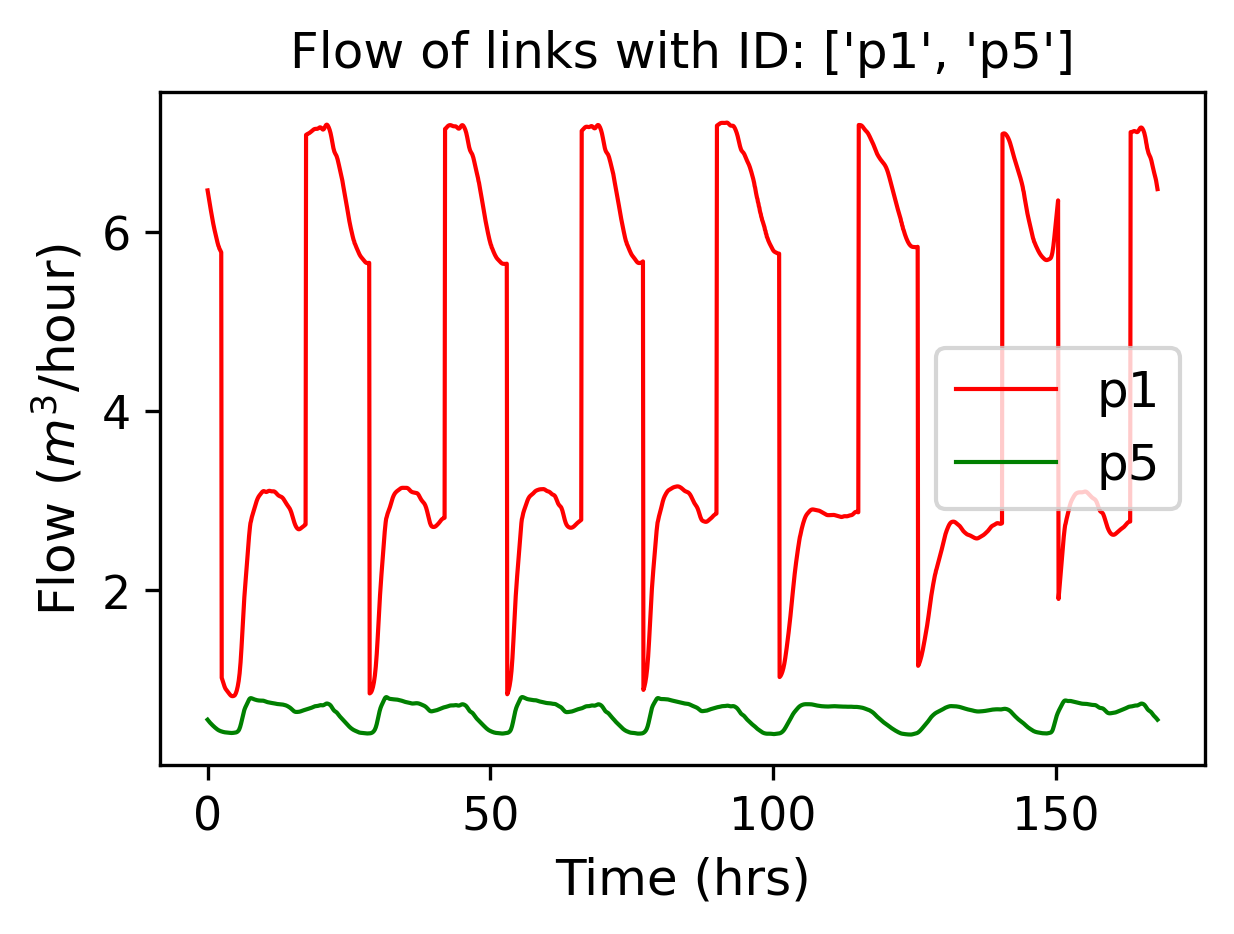

In [29]:
# Plot link flows and quality
hrs_time = R.Time / 3600  # transform seconds into hours
link_indices = [1, 5]  # select indices to plot
link_names = G.getLinkNameID(link_indices)  # get the ID of the link indices

G.plot_ts(X=hrs_time, Y=R.Flow[:, link_indices], title=f'Flow of links with ID: {link_names}', figure_size=[4, 3],
          legend_location='best', xlabel='Time (hrs)', ylabel=f'Flow ($m^3$/hour)', marker=None, color=['r', 'g'], labels=link_names, save_fig=True, filename='figures/paper_flows')